<a href="https://colab.research.google.com/github/nigarrajabli/Info/blob/main/_credit_giving_risk_analysing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns
sns.set()

In [ ]:
#Lets read our data

In [ ]:
cr=pd.read_csv('/content/credit_customers.csv')
cr

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [ ]:
#Look at the types

In [ ]:
cr.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [ ]:
#Get the descriptive statistics for categorical and numerical data

In [ ]:
cr.describe(include='all')

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,2
top,no checking,NaN,existing paid,radio/tv,NaN,<100,1<=X<4,NaN,male single,none,...,car,NaN,none,own,NaN,skilled,NaN,none,yes,good
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


In [ ]:
#Looking for Nan values

In [ ]:
cr.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [ ]:
#As there are columns with 2-4 unique and categoric values i will use labelencoder to change their type.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

def Labelen(cr):
  obj_col=cr.select_dtypes(include='object').columns
  for i in obj_col:
    cr[i]=LabelEncoder().fit_transform(cr[i])
  return cr

In [ ]:
Labelen(cr)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12.0,3,3,1736.0,2,1,3.0,0,2,...,3,31.0,1,1,1.0,3,1.0,0,1,1
996,1,30.0,3,9,3857.0,2,0,4.0,1,2,...,1,40.0,1,1,1.0,0,1.0,1,1,1
997,3,12.0,3,6,804.0,2,3,4.0,3,2,...,0,38.0,1,1,1.0,1,1.0,0,1,1
998,1,45.0,3,6,1845.0,2,0,4.0,3,2,...,2,23.0,1,0,1.0,1,1.0,1,1,0


In [ ]:
#Exploring outliers

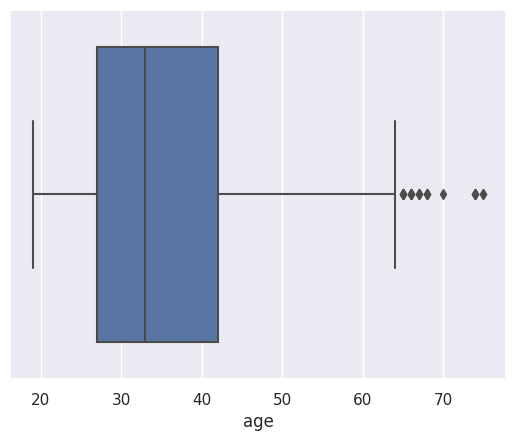

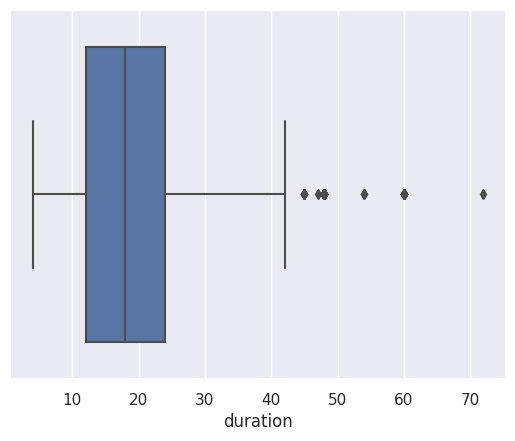

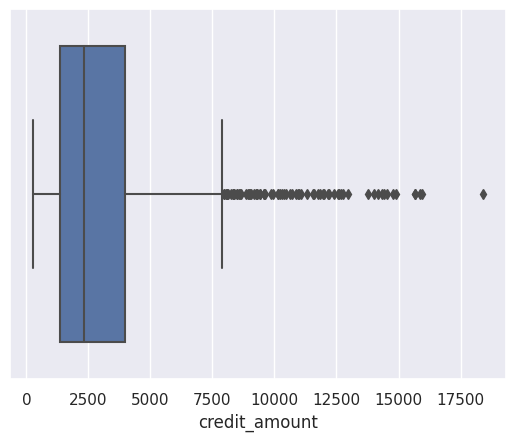

In [ ]:
for i in cr[['age','duration','credit_amount']]:
  sns.boxplot(data=cr,x=cr[i])
  plt.show()

In [ ]:
#IQR rule

In [ ]:
q1=cr.quantile(0.25)
q3=cr.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [ ]:
#Capping the outliers

In [ ]:
for i in cr[['age','duration','credit_amount']]:
    cr[i] = np.where(cr[i] > Upper[i],Upper[i],cr[i])
    cr[i] = np.where(cr[i] < Lower[i],Lower[i],cr[i])

In [ ]:
#Checking them

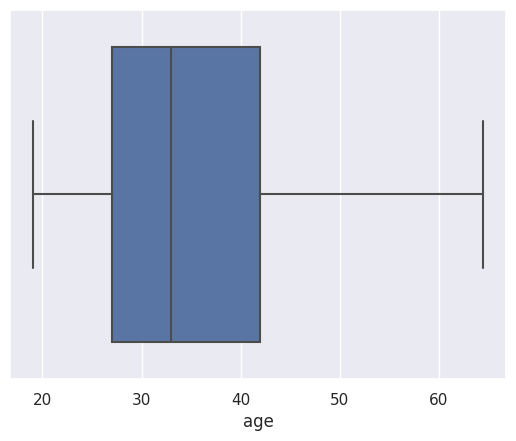

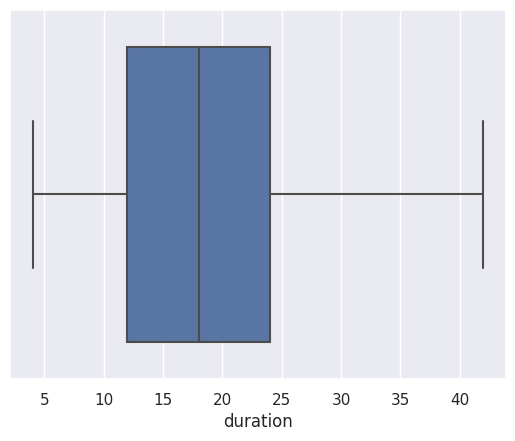

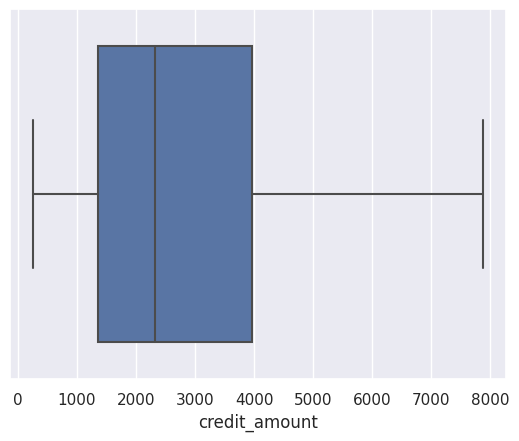

In [ ]:
for i in cr[['age','duration','credit_amount']]:
  sns.boxplot(data=cr,x=cr[i])
  plt.show()



In [ ]:
cr.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,64.5,1,1,2.0,1,1.0,1,1,1
1,0,42.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0


In [ ]:
#Making the heat map to have a look at the correlation between our y and x values.

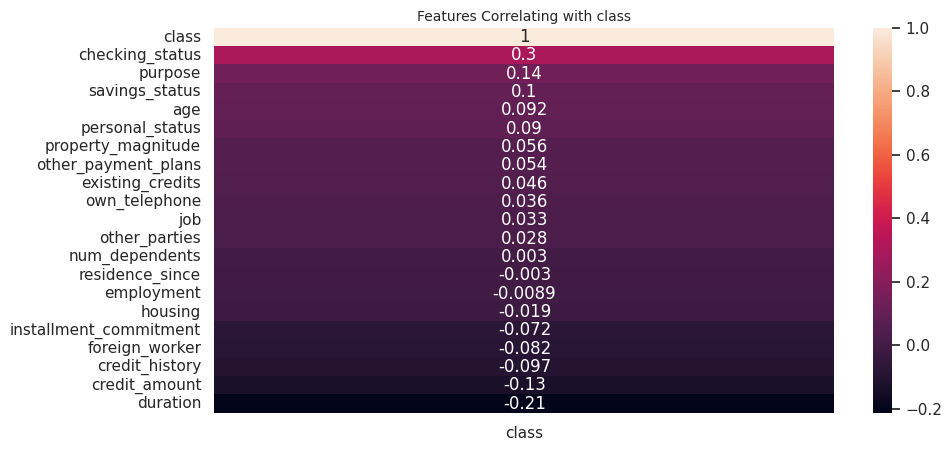

In [ ]:
plt.figure (figsize = (10, 5), dpi = 100)
heatmap = sns.heatmap (cr.corr()[['class']].sort_values (by = 'class', ascending = False),annot = True)
heatmap.set_title ('Features Correlating with class', fontdict = {'fontsize':10}, pad = 5);

In [ ]:
#VIF checking

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = cr.drop(['class','foreign_worker','other_parties','num_dependents','residence_since','installment_commitment'],axis=1)

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,2.709698,checking_status
1,7.527113,duration
2,5.112024,credit_history
3,4.333691,purpose
4,5.403322,credit_amount
5,4.764677,savings_status
6,2.590026,employment
7,3.179041,personal_status
8,2.488869,property_magnitude
9,11.850741,age


In [ ]:
# Creating new data  with only important  variables

In [ ]:
crsmall=cr[['class','checking_status','duration','purpose','credit_amount','savings_status','credit_history','age']]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = crsmall.drop(['class'],axis=1)

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,2.581447,checking_status
1,7.202778,duration
2,4.145359,purpose
3,5.094610,credit_amount
4,4.547318,savings_status
5,4.098335,credit_history
6,7.087004,age


In [ ]:
#Now assigning inputs and target

In [ ]:
inputs=crsmall.drop('class',axis=1)

target=crsmall['class']

In [ ]:
#Scaling process

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


scaler.fit(inputs)

StandardScaler()

In [ ]:
inputs_scaled = scaler.transform(inputs)


In [ ]:
data_scaled = pd.DataFrame(inputs_scaled, columns=inputs.columns)

data_scaled

,checking_status,duration,purpose,credit_amount,savings_status,credit_history,age
0,-0.464594,-1.348465,0.626481,-0.860961,1.669901,-1.146212,2.616620
1,-1.262865,2.044611,0.626481,1.326550,-0.130531,0.734365,-1.211943
2,1.131948,-0.782952,-1.026504,-0.436908,-0.130531,-1.146212,1.220321
3,-0.464594,2.044611,-0.613257,2.209879,-0.130531,0.734365,0.859985
4,-0.464594,0.348073,-0.200011,0.832050,-0.130531,-0.205923,1.580656
...,...,...,...,...,...,...,...
995,1.131948,-0.782952,-0.613257,-0.601589,-0.130531,0.734365,-0.401188
996,-0.464594,0.913586,1.866220,0.368656,-0.130531,0.734365,0.409566
997,1.131948,-0.782952,0.626481,-1.027929,-0.130531,0.734365,0.229399
998,-0.464594,2.044611,0.626481,-0.551727,-0.130531,0.734365,-1.121859


In [ ]:
#Spliting our data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=365)

In [ ]:
#Importing Logistic Regression model and evaluating it

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)

    gini_prob = roc_prob*2-1

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(confusion_matrix)
    print(report)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
result = evaluate(clf, X_test, y_test)

Model Performance
Gini prob is 52.251838235294116
[[ 21  43]
 [  4 132]]
              precision    recall  f1-score   support

           0       0.84      0.33      0.47        64
           1       0.75      0.97      0.85       136

    accuracy                           0.77       200
   macro avg       0.80      0.65      0.66       200
weighted avg       0.78      0.77      0.73       200



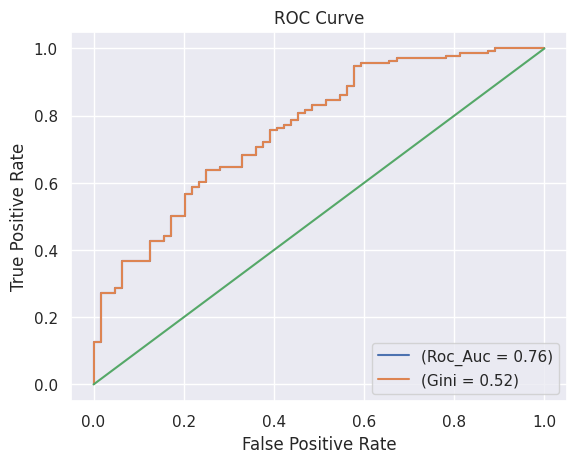

In [ ]:
y_prob = clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

### **`Getting Gini_score 52% and Roc_score 0.76 which is not bad ,means that we can use this model in future.`**